<a href="https://colab.research.google.com/github/usugunawan15/DTI-Telkom/blob/master/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np

In [30]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/usugunawan15/Tubes-DTI/Master/dataset/attrition_employee.csv')

print("Shape of dataframe is: {}".format(df.shape))
print(df.columns)

Shape of dataframe is: (1470, 36)
Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [31]:
df1 = df.copy()

In [32]:
for i in df.columns:
  print("unique value di kolom {}".format(i),df1[i].unique(),"\n")

unique value di kolom Unnamed: 0 [   0    1    2 ... 1467 1468 1469] 

unique value di kolom Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 

unique value di kolom Attrition ['Yes' 'No'] 

unique value di kolom BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

unique value di kolom DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1

In [33]:
df1['Department'] = df1['Department'].map( {'Sales': 0, 'Research & Development': 1, 'Human Resources':2} ).astype(int)

df1['EducationField'] = df1['EducationField'].map( {'Life Sciences': 0, 'Other': 1, 'Medical':2,'Marketing':3,'Technical Degree':4,'Human Resources':5} ).astype(int)

df1['BusinessTravel'] = df1['BusinessTravel'].map( {'Travel_Rarely': 0, 
                                                  'Travel_Frequently': 1, 
                                                  'Non-Travel':2} ).astype(int)

df1['Attrition'] = df1['Attrition'].map( {'Yes': 0,'No': 1} ).astype(int)

df1['Gender'] = df1['Gender'].map( {'Female': 0,'Male': 1} ).astype(int)

df1['JobRole'] = df1['JobRole'].map( {'Sales Executive': 0,
                                    'Research Scientist': 1, 
                                    'Laboratory Technician':2,
                                    'Manufacturing Director': 3,
                                    'Healthcare Representative': 4, 
                                    'Manager':5,
                                    'Sales Representative': 6,
                                    'Research Director': 7, 
                                    'Human Resources':8} ).astype(int)

df1['MaritalStatus'] = df1['MaritalStatus'].map( {'Single': 0, 
                                                'Married': 1, 
                                                'Divorced':2} ).astype(int)

df1['OverTime'] = df1['OverTime'].map( {'Yes': 0,'No': 1} ).astype(int)

In [34]:
#checking result
df1

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,0,0,1102,0,1,2,0,1,1,2,0,94,3,2,0,4,0,5993,19479,8,Y,0,11,3,1,80,0,8,0,1,6,4,0,5
1,1,49,1,1,279,1,8,1,0,1,2,3,1,61,2,2,1,2,1,5130,24907,1,Y,1,23,4,4,80,1,10,3,3,10,7,1,7
2,2,37,0,0,1373,1,2,2,1,1,4,4,1,92,2,1,2,3,0,2090,2396,6,Y,0,15,3,2,80,0,7,3,3,0,0,0,0
3,3,33,1,1,1392,1,3,4,0,1,5,4,0,56,3,1,1,3,1,2909,23159,1,Y,0,11,3,3,80,0,8,3,3,8,7,3,0
4,4,27,1,0,591,1,2,1,2,1,7,1,1,40,3,1,2,2,1,3468,16632,9,Y,1,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,1,1,884,1,23,2,2,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,Y,1,17,3,3,80,1,17,3,3,5,2,0,3
1466,1466,39,1,0,613,1,6,1,2,1,2062,4,1,42,2,3,4,1,1,9991,21457,4,Y,1,15,3,1,80,1,9,5,3,7,7,1,7
1467,1467,27,1,0,155,1,4,3,0,1,2064,2,1,87,4,2,3,2,1,6142,5174,1,Y,0,20,4,2,80,1,6,0,3,6,2,0,3
1468,1468,49,1,1,1023,0,2,3,2,1,2065,4,1,63,2,2,0,2,1,5390,13243,2,Y,1,14,3,4,80,0,17,3,2,9,6,0,8


In [35]:
label = df1.Attrition
label.shape

(1470,)

In [36]:
df1.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)

In [37]:
categorical_column = ['Department','EducationField', 'BusinessTravel', 'Gender', 'JobRole','MaritalStatus']

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
columns = list(df1.columns)
for col in columns:
    if col in categorical_column:
      print("continue")
      continue
    print(col)  
    df1[col] = df1[col].astype(float)
    df1[[col]] = scaler.fit_transform(df1[[col]])
df1.head()

Unnamed: 0
Age
continue
DailyRate
continue
DistanceFromHome
Education
continue
EnvironmentSatisfaction
continue
HourlyRate
JobInvolvement
JobLevel
continue
JobSatisfaction
continue
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


,Unnamed: 0,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.000000,0.547619,0,0.715820,0,0.000000,0.25,0,0.333333,0,0.914286,0.666667,0.25,0,1.000000,0,0.262454,0.698053,0.888889,0.0,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.000681,0.738095,1,0.126700,1,0.250000,0.00,0,0.666667,1,0.442857,0.333333,0.25,1,0.333333,1,0.217009,0.916001,0.111111,1.0,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.001361,0.452381,0,0.909807,1,0.035714,0.25,1,1.000000,1,0.885714,0.333333,0.00,2,0.666667,0,0.056925,0.012126,0.666667,0.0,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.002042,0.357143,1,0.923407,1,0.071429,0.75,0,1.000000,0,0.371429,0.666667,0.00,1,0.666667,1,0.100053,0.845814,0.111111,0.0,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.002723,0.214286,0,0.350036,1,0.035714,0.00,2,0.000000,1,0.142857,0.666667,0.00,2,0.333333,1,0.129489,0.583738,1.000000,1.0,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [38]:
from sklearn.model_selection import train_test_split  # import 'train_test_split'

X_train, X_test, y_train, y_test = train_test_split(df1,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=2020) 
 
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1176, 31)
Number transactions y_train dataset:  (1176,)
Number transactions X_test dataset:  (294, 31)
Number transactions y_test dataset:  (294,)


In [41]:
a = X_train.columns.to_list()
b = X_train.columns.to_list()
dict_df = dict()
for i in range(len(a)):
  dict_df.update({a[i]:[b[i]]})
dict_df
c = pd.DataFrame(dict_df)
c



,Unnamed: 0,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Unnamed: 0,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**LOGISTIC** **REGRESSION**

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
clf.score(X_test, y_test)

0.8605442176870748

In [43]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(clf, 'linear_regression.pkl')

['linear_regression.pkl']

**RANDOM FOREST**

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0,oob_score=True)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
importances = rf.feature_importances_
oob_score = rf.oob_score_
decision = rf.oob_decision_function_
print("OOB score {}".format(oob_score))
print("decision {}".format(decision.shape))

OOB score 0.8384353741496599
decision (1176, 2)


In [45]:
print(rf.predict([X_test.iloc[0]]))
prob = rf.predict_proba([X_test.iloc[0]])
print(prob)

if np.amax(prob) > 0.8:
  print("High Risk")
elif np.amax(prob) < 0.8 and np.amax(prob) > 0.6:
  print("Medium Risk")
elif np.amax(prob) < 0.6:
  print("Low Risk")

[1]
[[0.13452532 0.86547468]]
High Risk


In [46]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(rf, 'random_forest.pkl')

['random_forest.pkl']

In [47]:
#LOAD MODEL
import joblib
classifier = joblib.load("random_forest.pkl")
a = classifier.predict_proba([X_test.iloc[0]])
print(a)

[[0.13452532 0.86547468]]


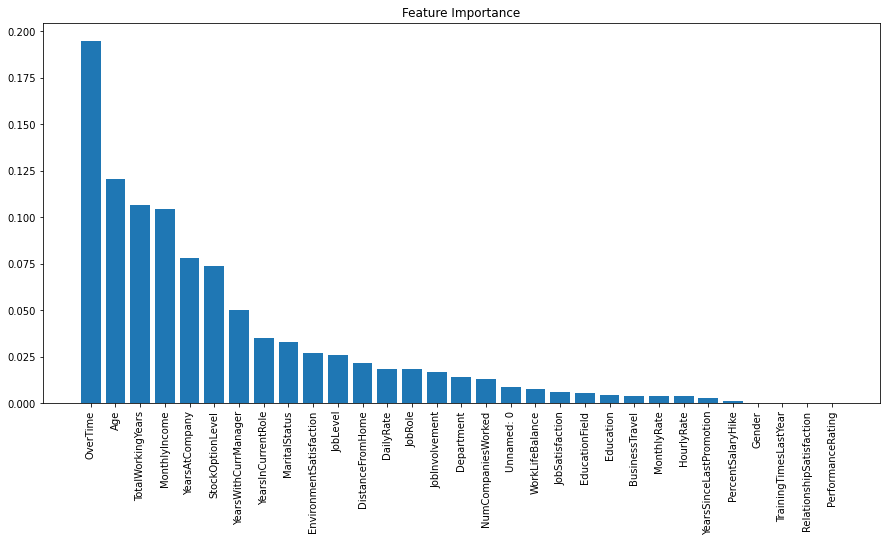

In [64]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [65]:
X_train.to_csv("draft.csv", index=False)

In [66]:
info = dict()
for i in df1.columns:
  mean = df1[i].mean()
  max = df1[i].max()
  min = df1[i].min()
  std = df1[i].std()
  info.update({
      "{}_max".format(i):[max],
      "{}_min".format(i):[min],
      "{}_mean".format(i):[mean],
      "{}_std".format(i):[std]
  })

In [67]:
df_info = pd.DataFrame(info)
df_info.to_csv("info.csv")
df_info

,Unnamed: 0_max,Unnamed: 0_min,Unnamed: 0_mean,Unnamed: 0_std,Age_max,Age_min,Age_mean,Age_std,BusinessTravel_max,BusinessTravel_min,BusinessTravel_mean,BusinessTravel_std,DailyRate_max,DailyRate_min,DailyRate_mean,DailyRate_std,Department_max,Department_min,Department_mean,Department_std,DistanceFromHome_max,DistanceFromHome_min,DistanceFromHome_mean,DistanceFromHome_std,Education_max,Education_min,Education_mean,Education_std,EducationField_max,EducationField_min,EducationField_mean,EducationField_std,EnvironmentSatisfaction_max,EnvironmentSatisfaction_min,EnvironmentSatisfaction_mean,EnvironmentSatisfaction_std,Gender_max,Gender_min,Gender_mean,Gender_std,...,PerformanceRating_max,PerformanceRating_min,PerformanceRating_mean,PerformanceRating_std,RelationshipSatisfaction_max,RelationshipSatisfaction_min,RelationshipSatisfaction_mean,RelationshipSatisfaction_std,StockOptionLevel_max,StockOptionLevel_min,StockOptionLevel_mean,StockOptionLevel_std,TotalWorkingYears_max,TotalWorkingYears_min,TotalWorkingYears_mean,TotalWorkingYears_std,TrainingTimesLastYear_max,TrainingTimesLastYear_min,TrainingTimesLastYear_mean,TrainingTimesLastYear_std,WorkLifeBalance_max,WorkLifeBalance_min,WorkLifeBalance_mean,WorkLifeBalance_std,YearsAtCompany_max,YearsAtCompany_min,YearsAtCompany_mean,YearsAtCompany_std,YearsInCurrentRole_max,YearsInCurrentRole_min,YearsInCurrentRole_mean,YearsInCurrentRole_std,YearsSinceLastPromotion_max,YearsSinceLastPromotion_min,YearsSinceLastPromotion_mean,YearsSinceLastPromotion_std,YearsWithCurrManager_max,YearsWithCurrManager_min,YearsWithCurrManager_mean,YearsWithCurrManager_std
0,1.0,0.0,0.5,0.28897,1.0,0.0,0.450567,0.217509,2,0,0.392517,0.665455,1.0,0.0,0.501421,0.28884,2,0,0.739456,0.527792,1.0,0.0,0.29259,0.289531,1.0,0.0,0.478231,0.256041,5,0,1.462585,1.43178,1.0,0.0,0.573923,0.364361,1,0,0.6,0.490065,...,1.0,0.0,0.153741,0.360824,1.0,0.0,0.570748,0.360403,1.0,0.0,0.264626,0.284026,1.0,0.0,0.28199,0.19452,1.0,0.0,0.466553,0.214878,1.0,0.0,0.587075,0.235492,1.0,0.0,0.175204,0.153163,1.0,0.0,0.234958,0.201285,1.0,0.0,0.14585,0.214829,1.0,0.0,0.242537,0.20989


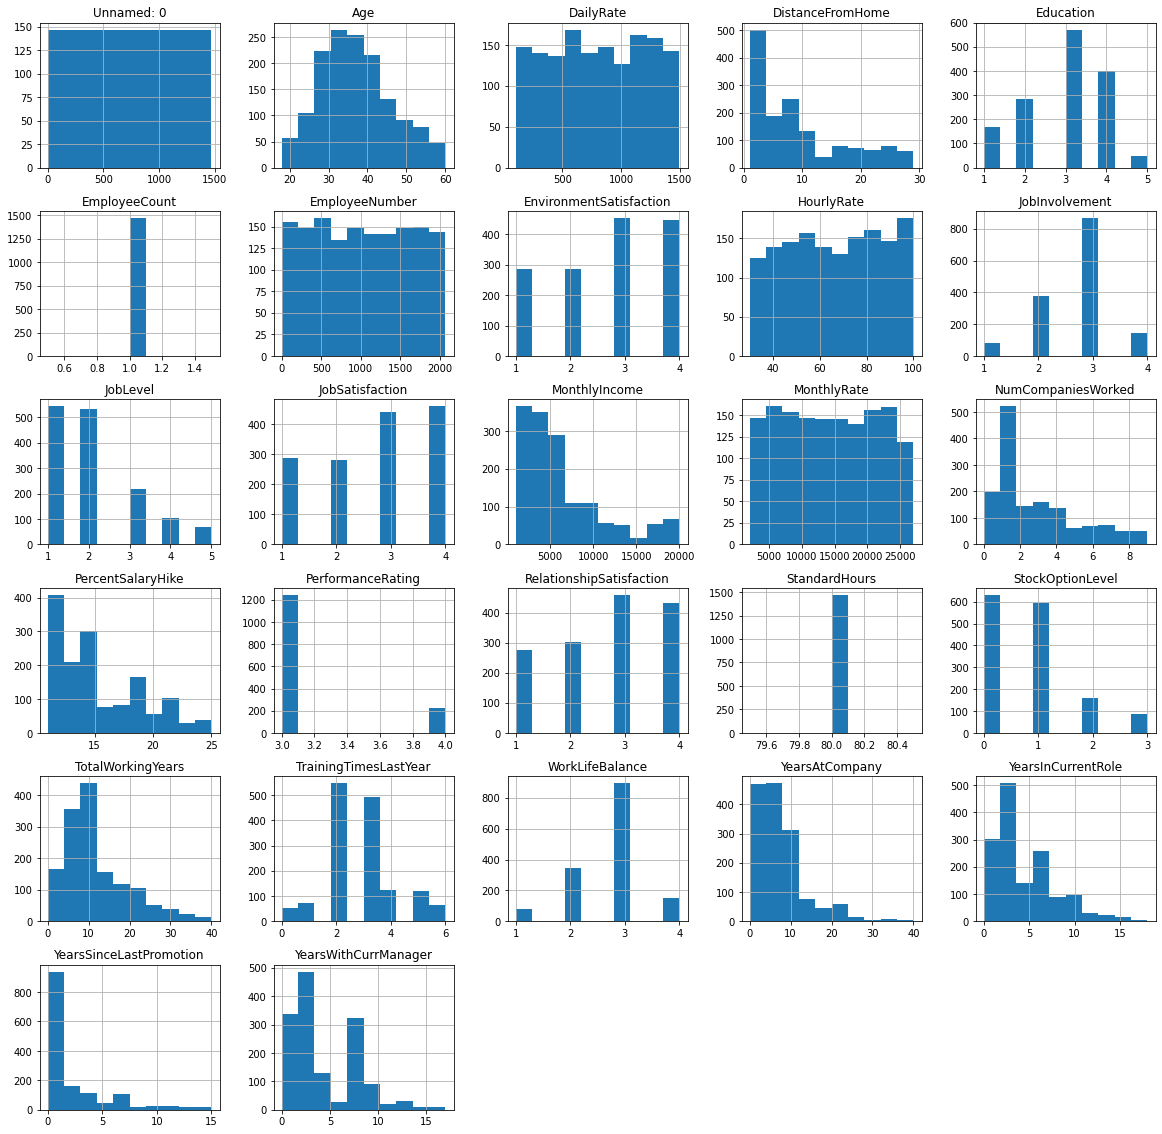

In [62]:
bar_plot = df.hist(figsize=(20,20))

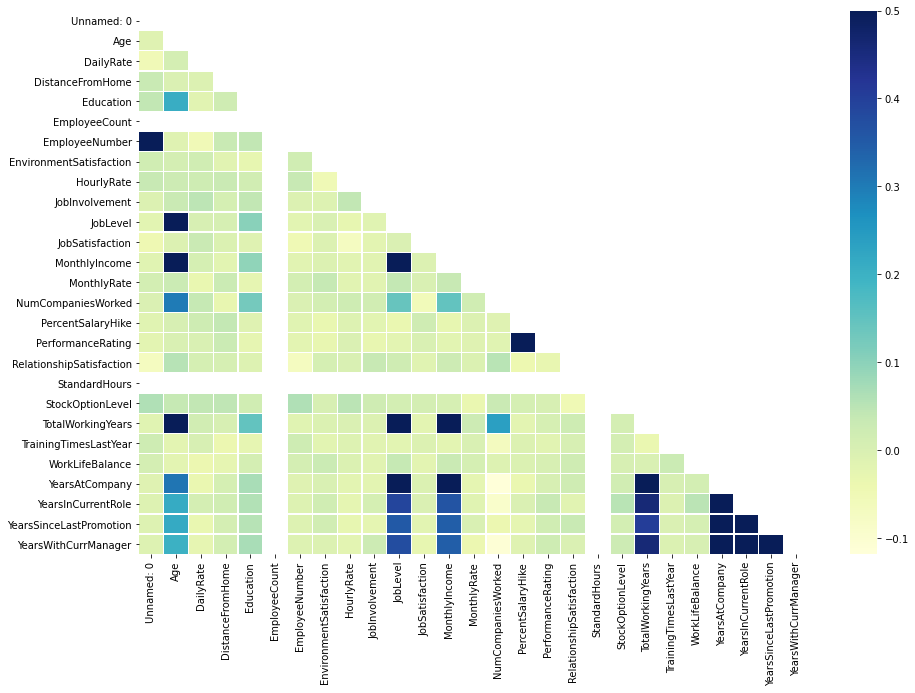

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate correlations
#df['Attrition'] = df['Attrition'].map( {'Yes': 0,'No': 1} ).astype(int)

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

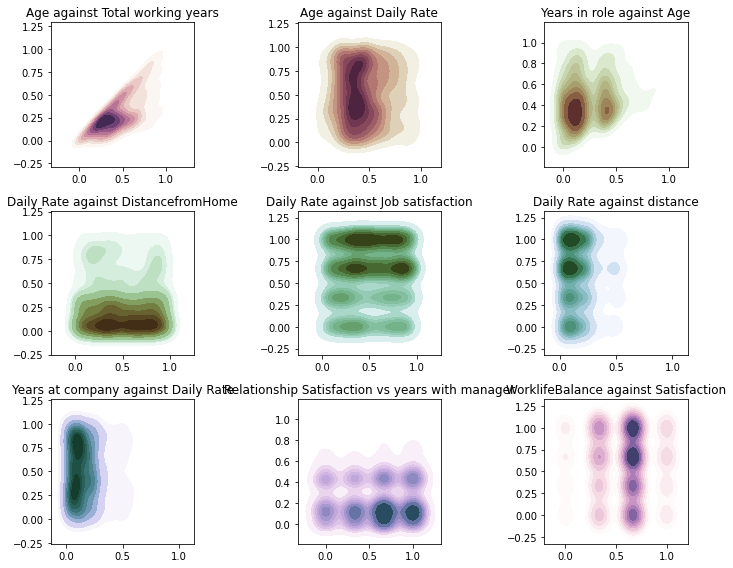

In [68]:
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = df1['Age'].values
y = df1['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df1['Age'].values
y = df1['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df1['YearsInCurrentRole'].values
y = df1['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = df1['DailyRate'].values
y = df1['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df1['DailyRate'].values
y = df1['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df1['YearsAtCompany'].values
y = df1['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = df1['YearsAtCompany'].values
y = df1['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df1['RelationshipSatisfaction'].values
y = df1['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df1['WorkLifeBalance'].values
y = df1['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

In [69]:
df.to_csv("visualisasi.csv",index=False)